Saving figure dl_2


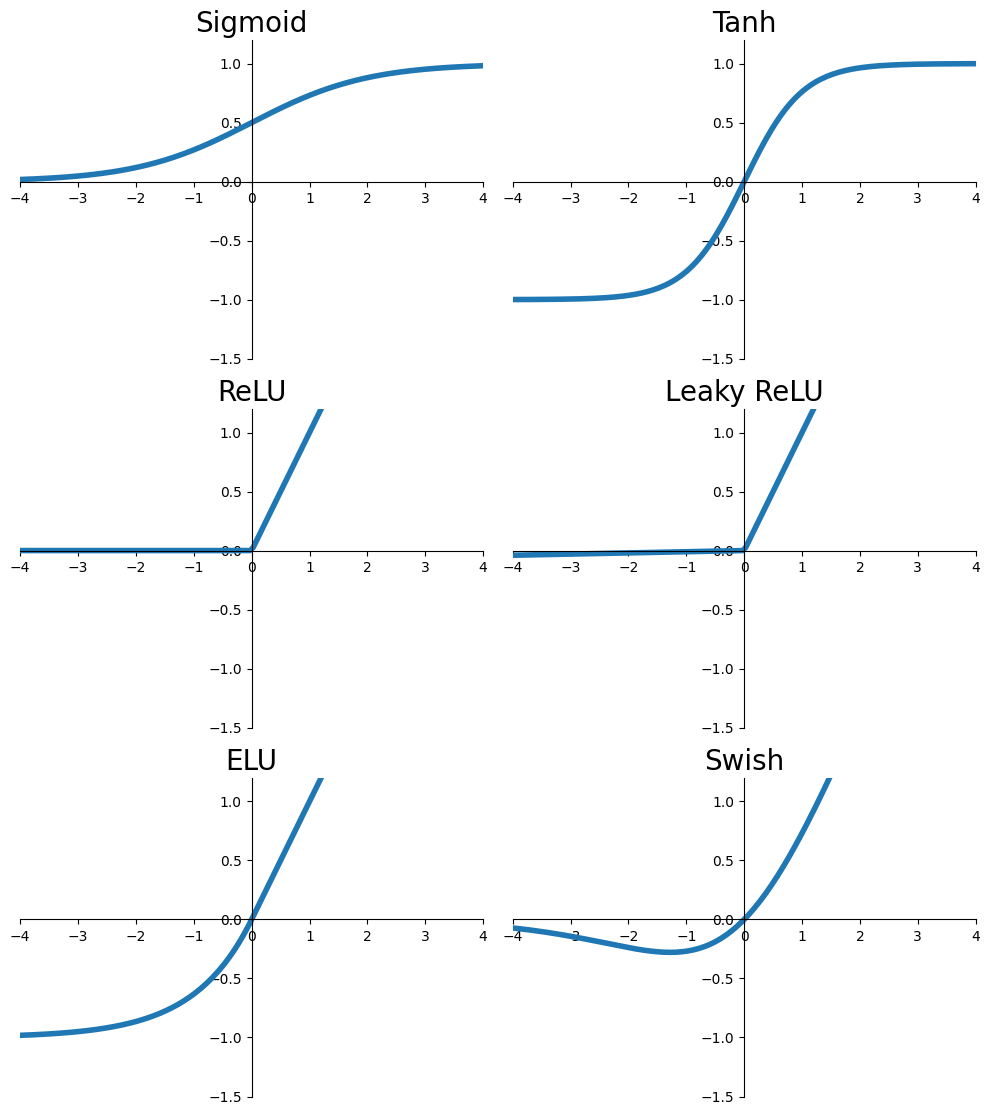

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

IMAGES_PATH='.'

def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Activation function names and definitions
activation_functions = [
    (sigmoid, "Sigmoid\nf(x) = 1 / (1 + exp(-x))"),
    (tanh, "Tanh\nf(x) = tanh(x)"),
    (relu, "ReLU\nf(x) = max(0, x)"),
    (leaky_relu, "Leaky ReLU\nf(x) = x if x>=0; αx if x<0"),
    (elu, "ELU\nf(x) = x if x>=0; α(exp(x)-1) if x<0"),
    (swish, "Swish\nf(x) = x * sigmoid(x)")
]

activation_functions = [
    (sigmoid, "Sigmoid"),
    (tanh, "Tanh"),
    (relu, "ReLU"),
    (leaky_relu, "Leaky ReLU"),
    (elu, "ELU"),
    (swish, "Swish")
]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot each activation function
for idx, (func, definition) in enumerate(activation_functions):
    row = idx // 2
    col = idx % 2
    x = np.linspace(-5, 5, 200)
    y = func(x)
    
    ax = axes[row, col]
    ax.set_title(definition, fontsize=20)  # Larger titles
    ax.grid(False)  # Turn off the grid
    ax.set_xlim([-4, 4])
    ax.set_ylim([-1.5, 1.2])
    
    # Display main axes
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.plot(x, y, linewidth=4)  # Thicker lines

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin for the suptitle
save_fig('dl_2')
plt.show()


Saving figure gd_batch


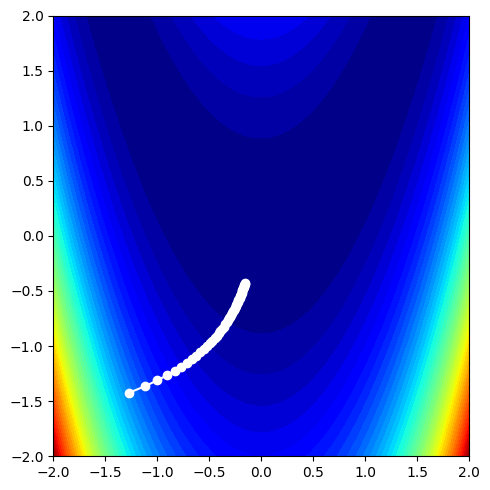

Saving figure gd_minibatch


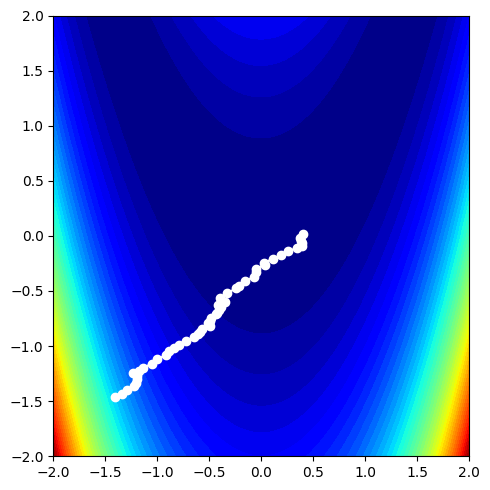

Saving figure gd_stochastic


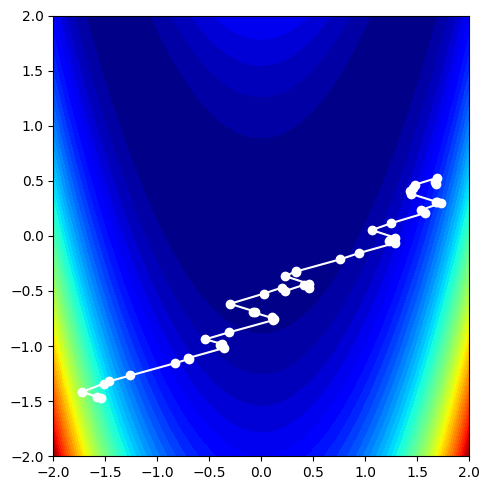

Saving figure gd_momentum


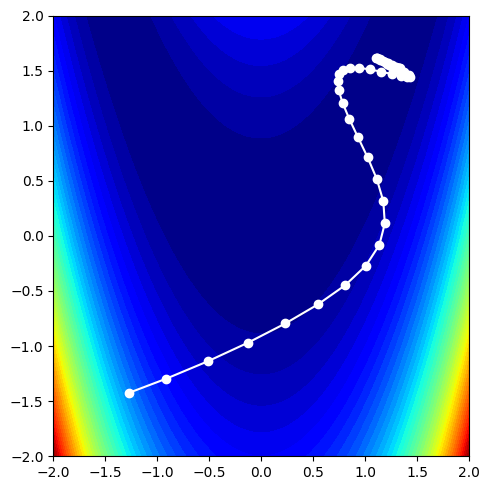

In [2]:
import numpy as np
import matplotlib.pyplot as plt

start_point = [-1.5, -1.5]

# Rosenbrock function
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def df(x, y):
    grad_x = -2 * (1 - x) - 400 * x * (y - x**2)
    grad_y = 200 * (y - x**2)
    return np.array([grad_x, grad_y])

# Gradient descent algorithms
def batch_gradient_descent(learning_rate, num_iterations):
    trajectory = []
    point = np.array(start_point)
    for _ in range(num_iterations):
        gradient_vector = df(*point)
        point -= learning_rate * gradient_vector
        trajectory.append(point.copy())
    return np.array(trajectory)

def mini_batch_gradient_descent(learning_rate, num_iterations, batch_size):
    trajectory = []
    point = np.array(start_point)
    for _ in range(num_iterations):
        batch_indices = np.random.choice(range(len(data)), batch_size, replace=False)
        batch_gradient = np.mean([df(*data[i]) for i in batch_indices], axis=0)
        point -= learning_rate * batch_gradient
        trajectory.append(point.copy())
    return np.array(trajectory)

def stochastic_gradient_descent(learning_rate, num_iterations):
    trajectory = []
    point = np.array(start_point)
    for _ in range(num_iterations):
        data_index = np.random.randint(0, len(data))
        point -= learning_rate * df(*data[data_index])
        trajectory.append(point.copy())
    return np.array(trajectory)

def momentum_gradient_descent(learning_rate, num_iterations, momentum):
    trajectory = []
    point = np.array(start_point)
    velocity = np.zeros(2)
    for _ in range(num_iterations):
        gradient_vector = df(*point)
        velocity = momentum * velocity - learning_rate * gradient_vector
        point += velocity
        trajectory.append(point.copy())
    return np.array(trajectory)

np.random.seed(1)

# Generate synthetic data points for the Rosenbrock function
data = np.random.uniform(-2, 2, size=(100, 2))

# Parameters
learning_rate = 0.0001
num_iterations = 50
batch_size = 15
momentum = 0.9

# Run optimization algorithms
batch_trajectory = batch_gradient_descent(learning_rate, num_iterations)
mini_batch_trajectory = mini_batch_gradient_descent(learning_rate, num_iterations, batch_size)
stochastic_trajectory = stochastic_gradient_descent(learning_rate, num_iterations)
momentum_trajectory = momentum_gradient_descent(learning_rate, num_iterations, momentum)

scale = 2
axes = [-1*scale, 1*scale, -1*scale, 1*scale]

# Create a grid of points for the Rosenbrock function
x_range = np.linspace(axes[0], axes[1], 500)
y_range = np.linspace(axes[2], axes[3], 500)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Plot the trajectories and the Rosenbrock function
fs = (5,5)
plt.figure(figsize=fs)
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.plot(batch_trajectory[:, 0], batch_trajectory[:, 1], '-o', color='white')
plt.tight_layout()
plt.xlim(axes[0], axes[1])
plt.ylim(axes[2], axes[3])
save_fig('gd_batch')
plt.show()

plt.figure(figsize=fs)
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.plot(mini_batch_trajectory[:, 0], mini_batch_trajectory[:, 1], '-o', color='white')
plt.tight_layout()
plt.xlim(axes[0], axes[1])
plt.ylim(axes[2], axes[3])
save_fig('gd_minibatch')
plt.show()

plt.figure(figsize=fs)
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.plot(stochastic_trajectory[:, 0], stochastic_trajectory[:, 1], '-o', color='white')
plt.tight_layout()
plt.xlim(axes[0], axes[1])
plt.ylim(axes[2], axes[3])
save_fig('gd_stochastic')
plt.show()

plt.figure(figsize=fs)
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.plot(momentum_trajectory[:, 0], momentum_trajectory[:, 1], '-o', color='white')
plt.tight_layout()
plt.xlim(axes[0], axes[1])
plt.ylim(axes[2], axes[3])
save_fig('gd_momentum')
plt.show()

In [3]:
axes[3]

2